In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
import time
import concurrent.futures
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import mplfinance as mpf
import plotly.graph_objects as go
import nbformat
import plotly.io as pio
from sklearn.preprocessing import StandardScaler

In [2]:
from DataProvider import DataProvider


In [3]:
data_provider = DataProvider('Data/Binance_BTCUSDT_2023_minute.csv')
raw_df = data_provider.get_raw_data()
normalized_df = data_provider.get_normalized_data()


In [4]:
raw_df.describe()

,open,high,low,close,volume,volume_from,tradecount
count,525517.000000,525517.000000,525517.000000,525517.000000,525517.000000,525517.000000,525517.000000
mean,28803.832840,28811.735277,28795.828173,28803.881842,3.320921,13.487693,6.747688
std,5882.314843,5883.514967,5880.963863,5882.318891,1.317859,1.337235,1.141318
min,16506.040000,16508.730000,16499.010000,16505.870000,0.000000,0.000000,0.000000
25%,25921.990000,25928.050000,25915.990000,25922.000000,2.345930,12.554972,5.897154
50%,27718.300000,27728.210000,27709.440000,27718.250000,3.124975,13.410548,6.469250
75%,30286.120000,30290.010000,30282.000000,30286.130000,4.269519,14.431777,7.537430
max,44687.790000,44700.000000,44634.520000,44687.800000,8.679104,18.798813,11.583533


In [5]:
normalized_df.describe()

,open,high,low,close,volume,volume_from,tradecount
count,5.255170e+05,5.255170e+05,5.255170e+05,5.255170e+05,5.255170e+05,5.255170e+05,5.255170e+05
mean,-1.124068e-15,7.961066e-16,5.313146e-16,1.213197e-15,6.572206e-16,-5.603033e-16,-1.251488e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.090640e+00,-2.091100e+00,-2.090955e+00,-2.090676e+00,-2.519940e+00,-1.008627e+01,-5.912194e+00
25%,-4.899169e-01,-4.901301e-01,-4.896886e-01,-4.899232e-01,-7.398307e-01,-6.975006e-01,-7.452217e-01
50%,-1.845420e-01,-1.841631e-01,-1.847298e-01,-1.845587e-01,-1.486857e-01,-5.768962e-02,-2.439618e-01
75%,2.519907e-01,2.512573e-01,2.527091e-01,2.519839e-01,7.198032e-01,7.059977e-01,6.919566e-01
max,2.700293e+00,2.700474e+00,2.693216e+00,2.700284e+00,4.065829e+00,3.971723e+00,4.237074e+00


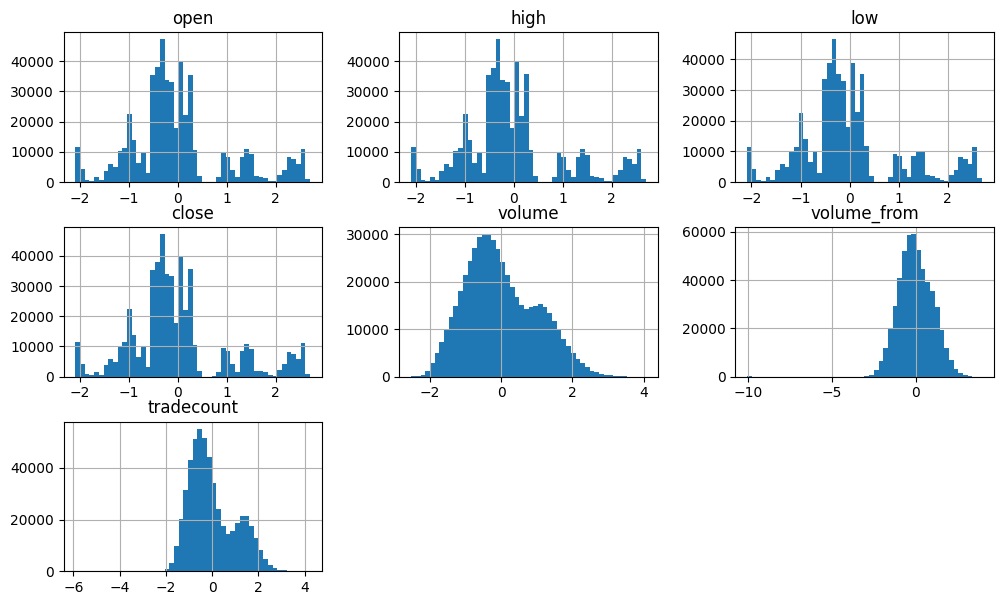

In [7]:
normalized_df.hist(figsize=(12, 7), bins=50)
plt.show()

   index  entry_price  exit_price  type  contracts  profit_loss
0      0          100         110  long       10.0    90.909091


In [4]:
# Sample data for demonstration
import pandas as pd

from Trader import Trader


data = {
    'close': [100, 105, 110, 105, 100, 95, 90, 95, 100, 105]  # Simulated close prices
}
df = pd.DataFrame(data)

# Initialize the Trader
trade_size_dollars = 1000  # Trade size in dollars
initial_capital = 10000    # Initial capital in dollars
trader = Trader(df, trade_size_dollars, initial_capital)

# Define a series of actions: 0 for long, 1 for wait, 2 for short
actions = [0, 1, 2, 1, 1, 1, 1, 1, 1, 0]  # Example sequence of actions

# Simulate trading
for action in actions:
    result, done = trader.step(action)
    if done:
        break

# Get the trade history
trade_history_df = trader.get_trade_history_df()
print(trade_history_df)


   index  entry_price  exit_price   type  contracts  profit_loss
0      0          100       110.0   long  10.000000   100.000000
1      2          110       105.0  short   9.090909    45.454545
2      9          105         NaN   long   9.523810          NaN


In [5]:
trader.current_capital

10145.454545454546